### Flight Price Prediction EDA & Feature Engineering

In [198]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [199]:
# read the datasets
train = pd.read_excel("Data_Train.xlsx")
test = pd.read_excel("Test_set.xlsx")

In [200]:
# let's take a look at our datasets
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [201]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [202]:
# check the dimensions of the datasets
print("Train Data:", train.shape)
print("Test Data:", test.shape)

Train Data: (10683, 11)
Test Data: (2671, 10)


In [203]:
# check the datatypes
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [204]:
test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [205]:
# Descriptive Statistics
train.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10683,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10683,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10683,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10683,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL → BOM → COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10683,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10683,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10683,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10683,10,No info,8345,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
# Concise Summary 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [207]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [208]:
# check for null/missing data
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [209]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

As you can see that there are 1 missing values in "Route" and "Total_Stops". After carefully observing the data we decided to fill the missing values as follows:

In [210]:
# imputing the missing values
train['Route'] = train['Route'].fillna("DEL → AMD → BOM → COK")
train['Total_Stops'] = train['Total_Stops'].fillna("2 stops")

In [211]:
# Date of Journey
train["Date"] = train['Date_of_Journey'].apply(lambda x:x.split("/")[0])
train["Month"] = train['Date_of_Journey'].apply(lambda x:x.split("/")[1])
train["Year"] = train['Date_of_Journey'].apply(lambda x:x.split("/")[2])

# Drop the column
train = train.drop(['Date_of_Journey'], axis=1)

# change the datatype
train['Date'] = train['Date'].astype('int')
train['Month'] = train['Month'].astype('int')
train['Year'] = train['Year'].astype('int')


In [212]:
# Dep_Time
train['Dep_Hour'] = train['Dep_Time'].apply(lambda x:x.split(":")[0])
train['Dep_Min'] = train['Dep_Time'].apply(lambda x:x.split(":")[1])

# Drop the column
train = train.drop(['Dep_Time'],axis=1)

# change the datatype
train['Dep_Hour'] = train['Dep_Hour'].astype('int')
train['Dep_Min'] = train['Dep_Min'].astype('int')

In [213]:
# Arrival_Time
train['Arrival_Time'] = train['Arrival_Time'].apply(lambda x:x.split(" ")[0])
train['Arrival_Hour'] = train['Arrival_Time'].apply(lambda x:x.split(":")[0])
train['Arrival_Min'] = train['Arrival_Time'].apply(lambda x:x.split(":")[1])

# Drop the Column
train = train.drop(['Arrival_Time'],axis=1)

# change the datatype
train['Arrival_Hour'] = train['Arrival_Hour'].astype('int')
train['Arrival_Min'] = train['Arrival_Min'].astype('int')

In [214]:
# Duration
train['Duration_Hour']=train['Duration'].str.split(' ').str[0].str.split('h').str[0]
train['Duration_Min']=train['Duration'].str.split(' ').str[1].str.split('m').str[0]

# replace incorrect values
train['Duration_Hour'] = train['Duration_Hour'].replace('5m','0')
train['Duration_Min'] = train['Duration_Min'].fillna('0')

# drop the column
train = train.drop(['Duration'],axis=1)

# change the datatype
train['Duration_Hour'] = train['Duration_Hour'].astype('int')
train['Duration_Min'] = train['Duration_Min'].astype('int')

Now for our analysis we will convert "Duration_Hour" into minutes and then add it to "Duration_Min" to get total minutes and then we will convert it into Duration in hour for ease of analysis.

In [215]:
# convert it into minutes
train['Duration_Hour'] = train['Duration_Hour']*60

# add columns to get total minutes
train['Total_Travel_Time_Hour'] = train['Duration_Hour'] + train['Duration_Min']

# convert it into hours
train['Total_Travel_Time_Hour'] = round(train['Total_Travel_Time_Hour']/60,3)

# drop the unnecessary columns
train = train.drop(['Duration_Hour', 'Duration_Min'], axis=1)

In [216]:
# Destination
train['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

here we will replace "New Delhi" with "Delhi"

In [217]:
# replacing the values
train['Destination'] = train['Destination'].replace('New Delhi', 'Delhi')

In [218]:
# check datatypes
train.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Total_Stops                object
Additional_Info            object
Price                       int64
Date                        int32
Month                       int32
Year                        int32
Dep_Hour                    int32
Dep_Min                     int32
Arrival_Hour                int32
Arrival_Min                 int32
Total_Travel_Time_Hour    float64
dtype: object

In [219]:
# check for missing values
train.isnull().sum()

Airline                   0
Source                    0
Destination               0
Route                     0
Total_Stops               0
Additional_Info           0
Price                     0
Date                      0
Month                     0
Year                      0
Dep_Hour                  0
Dep_Min                   0
Arrival_Hour              0
Arrival_Min               0
Total_Travel_Time_Hour    0
dtype: int64

In [220]:
# check for duplicated records
train.duplicated().sum()

222

In [221]:
# drop duplicated records
train = train.drop_duplicates()

In [222]:
# check for duplicated records
train.duplicated().sum()

0

In [223]:
# check train data
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Total_Travel_Time_Hour
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2.833
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7.417
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19.000
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5.417
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4.750


#### Now we will perform the same steps on test data

In [224]:
# Date of Journey
test["Date"] = test['Date_of_Journey'].apply(lambda x:x.split("/")[0])
test["Month"] = test['Date_of_Journey'].apply(lambda x:x.split("/")[1])
test["Year"] = test['Date_of_Journey'].apply(lambda x:x.split("/")[2])

# Drop the column
test = test.drop(['Date_of_Journey'], axis=1)

# change the datatype
test['Date'] = test['Date'].astype('int')
test['Month'] = test['Month'].astype('int')
test['Year'] = test['Year'].astype('int')

In [225]:
# Dep_Time
test['Dep_Hour'] = test['Dep_Time'].apply(lambda x:x.split(":")[0])
test['Dep_Min'] = test['Dep_Time'].apply(lambda x:x.split(":")[1])

# Drop the column
test = test.drop(['Dep_Time'],axis=1)

# change the datatype
test['Dep_Hour'] = test['Dep_Hour'].astype('int')
test['Dep_Min'] = test['Dep_Min'].astype('int')

In [226]:
# Arrival_Time
test['Arrival_Time'] = test['Arrival_Time'].apply(lambda x:x.split(" ")[0])
test['Arrival_Hour'] = test['Arrival_Time'].apply(lambda x:x.split(":")[0])
test['Arrival_Min'] = test['Arrival_Time'].apply(lambda x:x.split(":")[1])

# Drop the Column
test = test.drop(['Arrival_Time'],axis=1)

# change the datatype
test['Arrival_Hour'] = test['Arrival_Hour'].astype('int')
test['Arrival_Min'] = test['Arrival_Min'].astype('int')

In [227]:
# Duration
test['Duration_Hour']=test['Duration'].str.split(' ').str[0].str.split('h').str[0]
test['Duration_Min']=test['Duration'].str.split(' ').str[1].str.split('m').str[0]

# replace incorrect values
test['Duration_Hour'] = test['Duration_Hour'].replace('5m','0')
test['Duration_Min'] = test['Duration_Min'].fillna('0')

# drop the column
test = test.drop(['Duration'],axis=1)

# change the datatype
test['Duration_Hour'] = test['Duration_Hour'].astype('int')
test['Duration_Min'] = test['Duration_Min'].astype('int')

In [228]:
# convert it into minutes
test['Duration_Hour'] = test['Duration_Hour']*60

# add columns to get total minutes
test['Total_Travel_Time_Hour'] = test['Duration_Hour'] + test['Duration_Min']

# convert it into hours
test['Total_Travel_Time_Hour'] = round(test['Total_Travel_Time_Hour']/60,3)

# drop the unnecessary columns
test = test.drop(['Duration_Hour', 'Duration_Min'], axis=1)

In [229]:
# Destination
test['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [230]:
# replacing the values
test['Destination'] = test['Destination'].replace('New Delhi', 'Delhi')

In [231]:
# check datatypes
test.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Total_Stops                object
Additional_Info            object
Date                        int32
Month                       int32
Year                        int32
Dep_Hour                    int32
Dep_Min                     int32
Arrival_Hour                int32
Arrival_Min                 int32
Total_Travel_Time_Hour    float64
dtype: object

In [232]:
# check for missing values
test.isnull().sum()

Airline                   0
Source                    0
Destination               0
Route                     0
Total_Stops               0
Additional_Info           0
Date                      0
Month                     0
Year                      0
Dep_Hour                  0
Dep_Min                   0
Arrival_Hour              0
Arrival_Min               0
Total_Travel_Time_Hour    0
dtype: int64

In [233]:
# check for duplicates
test.duplicated().sum()

26

In [234]:
# drop duplicates
test = test.drop_duplicates()

In [235]:
# check for duplicates
test.duplicated().sum()

0

In [236]:
# check test data
test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Date,Month,Year,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Total_Travel_Time_Hour
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,2019,17,30,4,25,10.917
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,2019,6,20,10,20,4.000
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,2019,19,15,19,0,23.750
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,2019,8,0,21,0,13.000
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2019,23,55,2,45,2.833


Now that we are done with data cleaning let's move towards a detailed EDA to gain insights from data.

In [237]:
# Airline
train['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

For our analysis we will replace "Multiple carriers Premium economy", "Jet Airways Business", "Vistara Premium economy" with their original names.

In [238]:
# replacing airline names with their original (For train data)
train['Airline'] = train['Airline'].replace(['Multiple carriers Premium economy', 'Jet Airways Business','Vistara Premium economy'],
                                            ['Multiple carriers', 'Jet Airways','Vistara'])

In [239]:
# replacing airline names with their original (For test data)
test['Airline'] = test['Airline'].replace(['Multiple carriers Premium economy', 'Jet Airways Business','Vistara Premium economy'],
                                            ['Multiple carriers', 'Jet Airways','Vistara'])

In [240]:
train['Airline'].value_counts()

Jet Airways          3706
IndiGo               2043
Air India            1695
Multiple carriers    1209
SpiceJet              815
Vistara               480
Air Asia              318
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64

As you can see that "Jet Airways" has maximum number of records in data.

In [248]:
# Airlines and their average prices.
airline_avg_price = train.groupby(['Airline'])['Price'].mean().round(2).sort_values(ascending=False).reset_index()
airline_avg_price

,Airline,Price
0,Jet Airways,11674.72
1,Multiple carriers,10908.23
2,Air India,9555.38
3,Vistara,7809.01
4,GoAir,5861.06
5,IndiGo,5668.47
6,Air Asia,5593.75
7,SpiceJet,4335.84
8,Trujet,4140.00


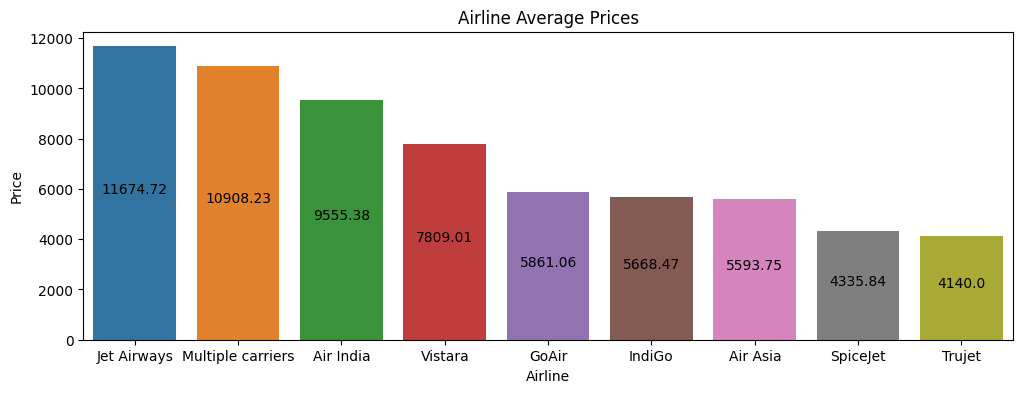

In [266]:
# let's visualize above data
# function to add value labels
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha='center')
if __name__=='__main__':
    x = airline_avg_price['Airline'].values
    y = airline_avg_price['Price'].values
    plt.figure(figsize=(12,4))
    sns.barplot(x='Airline',y='Price', data=airline_avg_price, ci=None, dodge=False, estimator=np.mean)
    add_labels(x,y)
    plt.title("Airline Average Prices")
    plt.show()

In [253]:
# Source to Destination Average Prices
source_avg_price = train.groupby(['Source', 'Destination'])['Price'].mean().round(2).sort_values(ascending=False).reset_index()
source_avg_price

,Source,Destination,Price
0,Delhi,Cochin,10460.91
1,Kolkata,Banglore,9143.08
2,Banglore,Delhi,8024.69
3,Mumbai,Hyderabad,5059.71
4,Chennai,Kolkata,4789.89


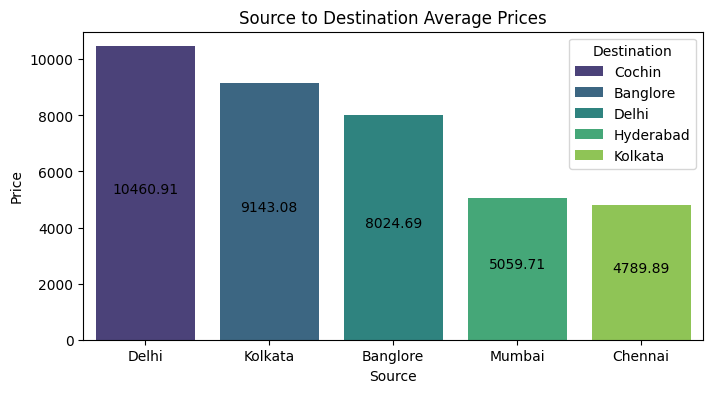

In [280]:
# let's visualize above data
# function to add value labels
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha='center')
if __name__=='__main__':
    x = source_avg_price['Source'].values
    y = source_avg_price['Price'].values
    plt.figure(figsize=(8,4))
    sns.barplot(x='Source',y='Price', hue='Destination', data=source_avg_price, ci=None, dodge=False, estimator=np.mean, palette='viridis')
    add_labels(x,y)
    plt.title("Source to Destination Average Prices")
    plt.show()

In [281]:
# Source to Destination Average Travel Time
source_travel_time = train.groupby(['Source', 'Destination'])['Total_Travel_Time_Hour'].mean().round(2).sort_values(
    ascending=False).reset_index()
source_travel_time

,Source,Destination,Total_Travel_Time_Hour
0,Delhi,Cochin,13.23
1,Kolkata,Banglore,12.43
2,Banglore,Delhi,6.28
3,Mumbai,Hyderabad,3.20
4,Chennai,Kolkata,2.33


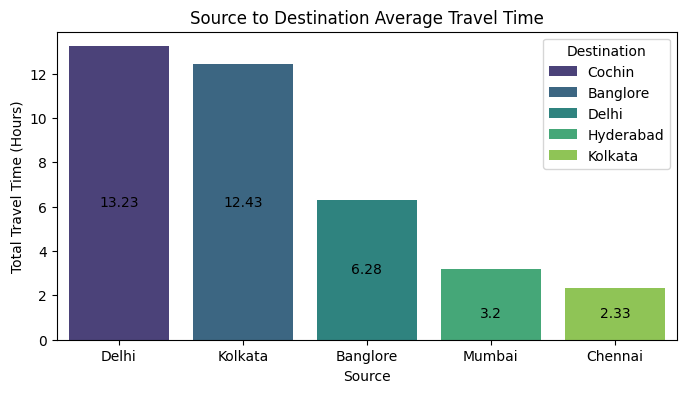

In [285]:
# let's visualize above data
# function to add value labels
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha='center')
if __name__=='__main__':
    x = source_travel_time['Source'].values
    y = source_travel_time['Total_Travel_Time_Hour'].values
    plt.figure(figsize=(8,4))
    sns.barplot(x='Source',y='Total_Travel_Time_Hour', hue='Destination', data=source_travel_time, ci=None, dodge=False, 
                estimator=np.mean, palette='viridis')
    add_labels(x,y)
    plt.ylabel("Total Travel Time (Hours)")
    plt.title("Source to Destination Average Travel Time")
    plt.show()

In [313]:
# Airlines with Less Travel Time(<4 Hours)
fast_travel_time_price = train.groupby(['Airline','Source','Destination'])['Total_Travel_Time_Hour','Price'].mean().round(2).sort_values(
    ascending=True,by='Total_Travel_Time_Hour').reset_index().head(16)
fast_travel_time_price

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17396\744487864.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fast_travel_time_price = train.groupby(['Airline','Source','Destination'])['Total_Travel_Time_Hour','Price'].mean().round(2).sort_values(


,Airline,Source,Destination,Total_Travel_Time_Hour,Price
0,IndiGo,Mumbai,Hyderabad,1.52,3659.82
1,SpiceJet,Mumbai,Hyderabad,1.53,2511.11
2,Air India,Chennai,Kolkata,2.25,5895.64
3,Vistara,Chennai,Kolkata,2.28,7528.50
4,SpiceJet,Chennai,Kolkata,2.31,3993.52
5,IndiGo,Chennai,Kolkata,2.36,4538.77
6,Jet Airways,Mumbai,Hyderabad,2.44,6227.95
7,Air Asia,Banglore,Delhi,2.80,4575.33
8,GoAir,Banglore,Delhi,2.92,4948.88
9,IndiGo,Banglore,Delhi,3.01,5245.56


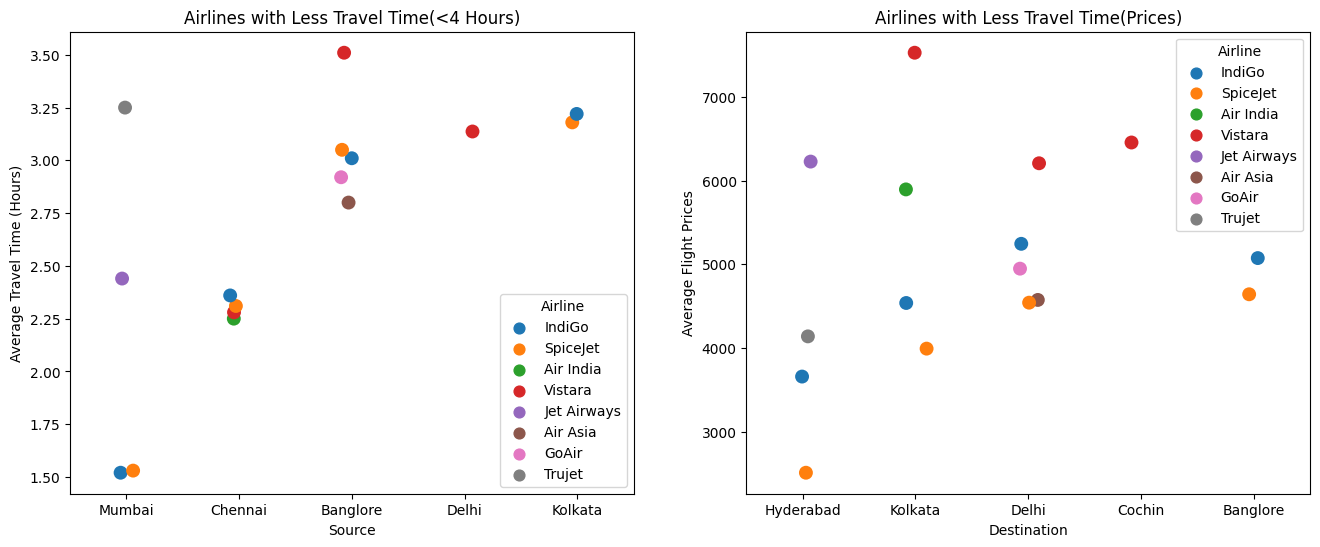

In [373]:
# let's visualize above data
fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(121)
sns.stripplot(x='Source', y='Total_Travel_Time_Hour', hue='Airline', data=fast_travel_time_price, size=10, ax=ax1)
plt.ylabel("Average Travel Time (Hours)")
plt.title("Airlines with Less Travel Time(<4 Hours)")

ax2 = fig.add_subplot(122)
sns.stripplot(x='Destination', y='Price', hue='Airline', data=fast_travel_time_price, size=10, ax=ax2)
plt.ylabel("Average Flight Prices")
plt.title("Airlines with Less Travel Time(Prices)")

plt.show()

In [385]:
# Airlines Flight Prices compared with Month
airline_monthly_price = train.groupby(['Airline','Month'])['Price'].mean().round(2).sort_values(ascending=True).reset_index()
airline_monthly_price

,Airline,Month,Price
0,SpiceJet,6,3942.29
1,SpiceJet,5,4060.43
2,Trujet,3,4140.00
3,SpiceJet,4,4248.40
4,Air Asia,4,4729.36
5,IndiGo,4,4779.93
6,GoAir,4,4953.43
7,GoAir,6,5058.53
8,IndiGo,6,5112.08
9,Air Asia,5,5174.35


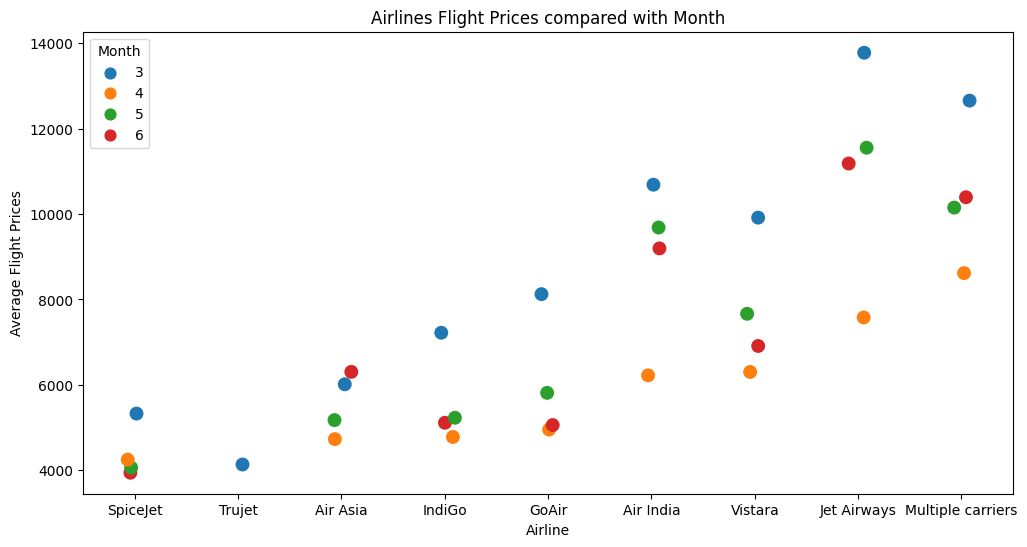

In [411]:
# Let's visualize above data
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(111)
sns.stripplot(x='Airline', y='Price', hue='Month', data=airline_monthly_price, ax=ax1, size=10)
plt.ylabel("Average Flight Prices")
plt.title("Airlines Flight Prices compared with Month")
plt.show()

In [412]:
# Airlines Flight Prices compared with Date
airline_daily_price = train.groupby(['Airline','Date'])['Price'].mean().round(2).sort_values(ascending=True).reset_index()
airline_daily_price

,Airline,Date,Price
0,SpiceJet,27,3757.22
1,SpiceJet,18,3914.27
2,SpiceJet,21,4089.90
3,Trujet,6,4140.00
4,SpiceJet,15,4275.46
...,...,...,...
76,Multiple carriers,1,12003.44
77,Multiple carriers,6,12538.58
78,Jet Airways,6,12880.42
79,Multiple carriers,3,13208.57


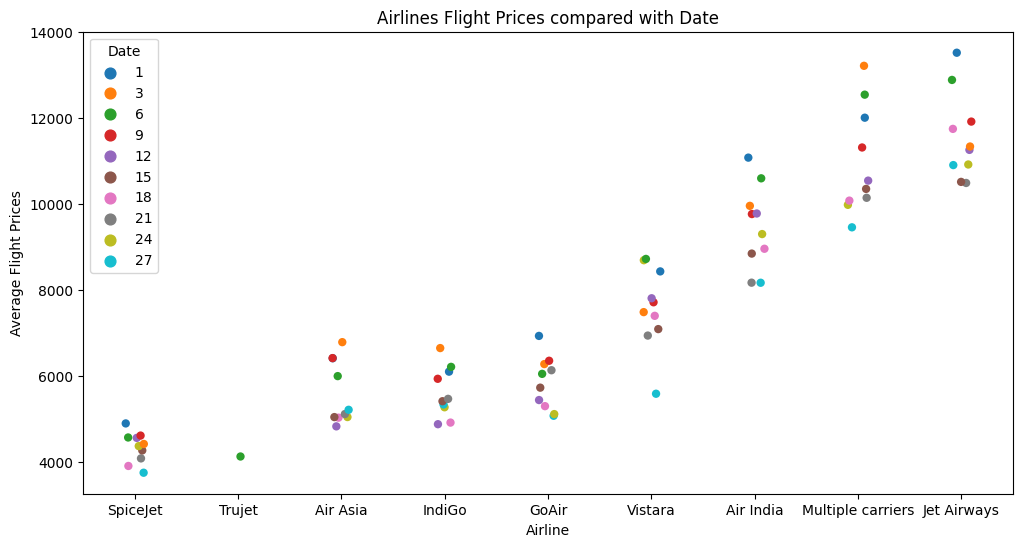

In [419]:
# Let's visualize above data
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(111)
sns.stripplot(x='Airline', y='Price', hue='Date', data=airline_daily_price, ax=ax1, size=6)
plt.ylabel("Average Flight Prices")
plt.title("Airlines Flight Prices compared with Date")
plt.show()